In [10]:
from pathlib import Path

from datasets import load_dataset, Dataset, concatenate_datasets, Image
from labeling.samplers import RandomSampler
from labeling.annotator import Annotator

In [12]:
img_dir = Path("/home/dani/dev/conny-dev/labeling/data/")

In [28]:
dataset = load_dataset(
            "imagefolder",
            data_dir=Path(img_dir),
            split="train"
        )

Using custom data configuration default-4d3be1fd63435cd2


Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /home/dani/.cache/huggingface/datasets/imagefolder/default-4d3be1fd63435cd2/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


In [29]:
a = Annotator(dataset, RandomSampler(), img_dir/"metadata.jsonl")

  0%|          | 0/4 [00:00<?, ?ex/s]

  0%|          | 0/4 [00:00<?, ?ex/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

Flattening the indices:   0%|          | 0/1 [00:00<?, ?ba/s]

In [32]:
a.unlabeled_data[0]["score"]

0.0

In [34]:
a.labeled_dataset[0]["image"]

{'bytes': None,
 'path': '/home/dani/dev/conny-dev/labeling/data/alec-favale-Ivzo69e18nk-unsplash.jpg'}

In [35]:
import timm

In [37]:
timm.data.create_loader?

In [38]:
model = timm.create_model('mobilenetv3_large_100', pretrained=True, num_classes=2)

In [42]:
import flash

ModuleNotFoundError: No module named 'flash'

In [41]:
model.

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv3_large_100_ra-f55367f5.pth',
 'num_classes': 1000,
 'input_size': (3, 224, 224),
 'pool_size': (7, 7),
 'crop_pct': 0.875,
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'first_conv': 'conv_stem',
 'classifier': 'classifier',
 'architecture': 'mobilenetv3_large_100'}

In [40]:
model.train?

In [6]:
dataset.cast_column("image", Image(decode=False)).add_item(dataset.cast_column("image", Image(decode=False))[0])

Dataset({
    features: ['image', 'label'],
    num_rows: 5
})

In [7]:
dataset.map(lambda sample: (sample, sample.update({"labeled": sample["label"] is not None}))[0]).sort("labeled")["labeled"]

Loading cached processed dataset at /home/dani/.cache/huggingface/datasets/imagefolder/default-c574937fd6438632/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f/cache-5c0ac4efc95a2ff6.arrow
Loading cached sorted indices for dataset at /home/dani/.cache/huggingface/datasets/imagefolder/default-c574937fd6438632/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f/cache-eb6cc2ea800b4d9d.arrow


[False, False, True, True]

In [8]:
dataset.to_pandas().to_dict(orient="records")

[{'image': {'bytes': None,
   'path': '/home/dani/dev/conny-dev/labeling/data/alec-favale-Ivzo69e18nk-unsplash.jpg'},
  'label': 'cat'},
 {'image': {'bytes': None,
   'path': '/home/dani/dev/conny-dev/labeling/data/andrew-s-ouo1hbizWwo-unsplash.jpg'},
  'label': None},
 {'image': {'bytes': None,
   'path': '/home/dani/dev/conny-dev/labeling/data/tran-mau-tri-tam-7QjU_u2vGDs-unsplash.jpg'},
  'label': None},
 {'image': {'bytes': None,
   'path': '/home/dani/dev/conny-dev/labeling/data/yan-laurichesse-3qZnN_M45Ds-unsplash.jpg'},
  'label': 'cat'}]

In [9]:
scores = np.ones((8))

In [10]:
scores = scores[:, None]

In [11]:
np.hstack([scores, 1-scores])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [12]:
from datasets import Image

In [15]:
Image(decode=True).decode_example(dataset.to_pandas().to_dict(orient="records")[0])

KeyError: 'path'

In [16]:
Dataset.from_list(dataset.to_pandas().to_dict(orient="records"))

Dataset({
    features: ['image', 'label'],
    num_rows: 4
})

In [36]:
dataset.to_pandas().to_dict(orient="records")

[{'image': {'bytes': None,
   'path': '/home/dani/dev/conny-dev/labeling/data/alec-favale-Ivzo69e18nk-unsplash.jpg'},
  'label': 'cat'},
 {'image': {'bytes': None,
   'path': '/home/dani/dev/conny-dev/labeling/data/andrew-s-ouo1hbizWwo-unsplash.jpg'},
  'label': None},
 {'image': {'bytes': None,
   'path': '/home/dani/dev/conny-dev/labeling/data/tran-mau-tri-tam-7QjU_u2vGDs-unsplash.jpg'},
  'label': None},
 {'image': {'bytes': None,
   'path': '/home/dani/dev/conny-dev/labeling/data/yan-laurichesse-3qZnN_M45Ds-unsplash.jpg'},
  'label': 'cat'}]

In [39]:
import torch

In [40]:
class CatData(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

In [41]:
c = CatData([{"label": 3}])

In [42]:
Dataset.from_list(c)

Dataset({
    features: ['label'],
    num_rows: 1
})

In [19]:
for sample in dataset:
    break

In [20]:
sample

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3652x5479 at 0x7F0C98B60FA0>,
 'label': 'cat'}

In [24]:
from datasets import Dataset

In [27]:
Dataset.map?

In [31]:
Dataset.from_list(d)

NotImplementedError: 

In [33]:
[_ for _ in d]

NotImplementedError: 

In [35]:
d[0]

NotImplementedError: 

In [170]:
rs = torch.utils.data.sampler.RandomSampler?

In [ ]:
rs = torch.utils.data.sampler.RandomSampler

In [ ]:
Image.decode_example

In [186]:
from labeling.annotator import make_tiny

In [194]:
dd = dataset.map(make_tiny)
dd["tiny"]

  0%|          | 0/4 [00:00<?, ?ex/s]

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=47x70 at 0x7F0C1A1FF520>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=70x47 at 0x7F0C1A1FFDF0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=70x53 at 0x7F0C1A1FFC40>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=70x53 at 0x7F0C1A1FFCA0>]

In [233]:
dd.to_pandas().to_dict(orient="records")

[{'image': {'bytes': None,
   'path': '/home/dani/dev/conny-dev/labeling/data/alec-favale-Ivzo69e18nk-unsplash.jpg'},
  'label': 'cat',
  'tiny': {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00/\x00\x00\x00F\x08\x02\x00\x00\x00\xd3\xbeZi\x00\x00\x01\x1ciCCPICC Profile\x00\x00x\x9cc``\xe2\xc9I\xce-f\x12``\xc8\xcd+)\nrwR\x88\x88\x8cR`\xbf\xc3\xc0\xc8 \xc9\xc0\xcc\xa0\xc9`\x99\x98\\\\\xe0\x18\x10\xe0\xc3\x80\x13|\xbb\x06T\r\x04\x97uAf\xe1V\x87\x15p\xa5\xa4\x16\'\x03\xe9?@\x1c\x97\\PT\xc2\xc0\xc0\x18\x03ds\x97\x97\x14\x80\xd8\x19@\xb6HR6\x98]\x03b\x17\x01\x1d\x08dO\x00\xb1\xd3!\xec%`5\x10\xf6\x0e\xb0\x9a\x90 g \xfb\x0c\x90\xed\x90\x8e\xc4NBbC\xed\x05\x01\xe6d#\x12]M\x04(I\xad(\x01\xd1\x9e\x11\x0c\x0c\xa00\x85\x88"\xc2\n!\xc6,\x06\xc4\xc6\x0c\x0cLK\x10b\xf9\x8b\x18\x18,\xbe\x02\xc5\' \xc4\x92f20loe`\x90\xb8\x85\x10SY\xc0\xc0\xc0\xdf\xc2\xc0\xb0\xed|riQ\x19\xd4j) >\xcdx\x929\x99u\x12G6\xf77\x01{\xd1@i\x13\xc5\x8f\x9a\x13\x8c$\xac\'\xb9\xb1\x06\x96\xc7\xbe\xcd.\xa8b\xed\xdc8\xabfM

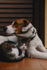

In [234]:
Image().decode_example(dd.cast_column("tiny", Image(decode=False))["tiny"][0])

In [235]:
import st_click_detector

In [254]:
x.insert(0, 8)

In [257]:
x.index?

[autoreload of labeling.samplers failed: Traceback (most recent call last):
  File "/home/dani/miniconda3/envs/conny_ml/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/dani/miniconda3/envs/conny_ml/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/home/dani/miniconda3/envs/conny_ml/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/dani/miniconda3/envs/conny_ml/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 329, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/dani/miniconda3/envs/conny_ml/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/dani/miniconda3/envs/conny_ml/lib/python3.9/site-packages/IPython/extensions/autoreload.py",

In [256]:
str(None)

'None'

In [236]:
def image_bytes_to_html(bytes, alt=""):
    return f'<img src="data:image/png;base64, {str(base64.b64encode(b))[2:-1]}" alt="{alt}"/>'


In [247]:
f"{str(base64.b64encode(b))[2:-1]}"

'iVBORw0KGgoAAAANSUhEUgAAAC8AAABGCAIAAADTvlppAAABHGlDQ1BJQ0MgUHJvZmlsZQAAeJxjYGDiyUnOLWYSYGDIzSspCnJ3UoiIjFJgv8PAyCDJwMygyWCZmFxc4BgQ4MOAE3y7BlQNBJd1QWbhVocVcKWkFicD6T9AHJdcUFTCwMAYA2Rzl5cUgNgZQLZIUjaYXQNiFwEdCGRPALHTIewlYDUQ9g6wmpAgZyD7DJDtkI7ETkJiQ+0FAeZkIxJdTQQoSa0oAdGeEQwMoDCFiCLCCiHGLAbExgwMTEsQYvmLGBgsvgLFJyDEkmYyMGxvZWCQuIUQU1nAwMDfwsCw7XxyaVEZ1GopID7NeJI5mXUSRzb3NwF70UBpE8WPmhOMJKwnubEGlse+zS6oYu3cOKtmTeb+2suHXxr8/w8A7pNTlvGwJJAAABinSURBVHicXXrpjyTHld/vvYjIo+7u6num5x7OaMgZUqIoSitR1GEdprSEtYcAW1rYCywM+2/xR8PfDBvGwh+8Wlg27AWstWV5d3UMR8v7Gh49Z8/03V3VdeUR8Z4/ZFWT2kSjOrMqMuNFvN/7vSvpj194joGgWvgQAAPJymBJRVCoEEhEVVWhhlAqVJWM80GhXgEvUKmGSOkDAQHwQRgUVIPqpPDjLLeGLJMCzAzVMigAw6SAqCaWfvTl1YVu0wJBRJkpshSCANSIHKBEWoMykYiKIivFMDgoqSqRIYRAADGJEIkiBDjHoupFGSQCQCPLom6U5wAAEFH1H1AARFAFAQQYa5jZ9geDIMQEBVRRjZ/epQBBBQJVnT4riFQjRSWIetGgKipQNYAoFCAFkbJKCADbar5KCgbkRJzZCROYwMbY1x/uTX+Zzv4PpZnd9cmhJ49TzGbXahABIKgSoKpQQLQSDkzVMR1DOptIQUTWWSKyl5a6QURUgyKoQivZVRWiOp1YVVQJED2Zm6ovRacSASo6HawzrYjqpPA+CACudn0

In [237]:
image_bytes_to_html(b)

'<img src="data:image/png;base64, b\'iVBORw0KGgoAAAANSUhEUgAAAC8AAABGCAIAAADTvlppAAABHGlDQ1BJQ0MgUHJvZmlsZQAAeJxjYGDiyUnOLWYSYGDIzSspCnJ3UoiIjFJgv8PAyCDJwMygyWCZmFxc4BgQ4MOAE3y7BlQNBJd1QWbhVocVcKWkFicD6T9AHJdcUFTCwMAYA2Rzl5cUgNgZQLZIUjaYXQNiFwEdCGRPALHTIewlYDUQ9g6wmpAgZyD7DJDtkI7ETkJiQ+0FAeZkIxJdTQQoSa0oAdGeEQwMoDCFiCLCCiHGLAbExgwMTEsQYvmLGBgsvgLFJyDEkmYyMGxvZWCQuIUQU1nAwMDfwsCw7XxyaVEZ1GopID7NeJI5mXUSRzb3NwF70UBpE8WPmhOMJKwnubEGlse+zS6oYu3cOKtmTeb+2suHXxr8/w8A7pNTlvGwJJAAABinSURBVHicXXrpjyTHld/vvYjIo+7u6num5x7OaMgZUqIoSitR1GEdprSEtYcAW1rYCywM+2/xR8PfDBvGwh+8Wlg27AWstWV5d3UMR8v7Gh49Z8/03V3VdeUR8Z4/ZFWT2kSjOrMqMuNFvN/7vSvpj194joGgWvgQAAPJymBJRVCoEEhEVVWhhlAqVJWM80GhXgEvUKmGSOkDAQHwQRgUVIPqpPDjLLeGLJMCzAzVMigAw6SAqCaWfvTl1YVu0wJBRJkpshSCANSIHKBEWoMykYiKIivFMDgoqSqRIYRAADGJEIkiBDjHoupFGSQCQCPLom6U5wAAEFH1H1AARFAFAQQYa5jZ9geDIMQEBVRRjZ/epQBBBQJVnT4riFQjRSWIetGgKipQNYAoFCAFkbJKCADbar5KCgbkRJzZCROYwMbY1x/uTX+Zzv4PpZnd9cmhJ49TzGbXahABIKgSoKpQQLQSDkzVMR1DOptIQUTWWSKyl5a6QURUgyKoQivZVRWiOp1YVVQ

In [225]:
b = dd.cast_column("tiny", Image(decode=False))["tiny"][0]["bytes"]
b

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00/\x00\x00\x00F\x08\x02\x00\x00\x00\xd3\xbeZi\x00\x00\x01\x1ciCCPICC Profile\x00\x00x\x9cc``\xe2\xc9I\xce-f\x12``\xc8\xcd+)\nrwR\x88\x88\x8cR`\xbf\xc3\xc0\xc8 \xc9\xc0\xcc\xa0\xc9`\x99\x98\\\\\xe0\x18\x10\xe0\xc3\x80\x13|\xbb\x06T\r\x04\x97uAf\xe1V\x87\x15p\xa5\xa4\x16\'\x03\xe9?@\x1c\x97\\PT\xc2\xc0\xc0\x18\x03ds\x97\x97\x14\x80\xd8\x19@\xb6HR6\x98]\x03b\x17\x01\x1d\x08dO\x00\xb1\xd3!\xec%`5\x10\xf6\x0e\xb0\x9a\x90 g \xfb\x0c\x90\xed\x90\x8e\xc4NBbC\xed\x05\x01\xe6d#\x12]M\x04(I\xad(\x01\xd1\x9e\x11\x0c\x0c\xa00\x85\x88"\xc2\n!\xc6,\x06\xc4\xc6\x0c\x0cLK\x10b\xf9\x8b\x18\x18,\xbe\x02\xc5\' \xc4\x92f20loe`\x90\xb8\x85\x10SY\xc0\xc0\xc0\xdf\xc2\xc0\xb0\xed|riQ\x19\xd4j) >\xcdx\x929\x99u\x12G6\xf77\x01{\xd1@i\x13\xc5\x8f\x9a\x13\x8c$\xac\'\xb9\xb1\x06\x96\xc7\xbe\xcd.\xa8b\xed\xdc8\xabfM\xe6\xfe\xda\xcb\x87_\x1a\xfc\xff\x0f\x00\xee\x93S\x96\xf1\xb0$\x90\x00\x00\x18\xa7IDATx\x9c]z\xe9\x8f$\xc7\x95\xdf\xef\xbd\x88\xc8\xa3\xee\xee\xea{\xa6\xe7

In [226]:
import base64

In [230]:
base64.b64encode(b)[:100]

b'iVBORw0KGgoAAAANSUhEUgAAAC8AAABGCAIAAADTvlppAAABHGlDQ1BJQ0MgUHJvZmlsZQAAeJxjYGDiyUnOLWYSYGDIzSspCnJ3'

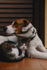

In [231]:
'(data:image/png;base64,'

'(data:image/png;base64,'

Hello cats


In [195]:
pd.DataFrame.from_records(dd.to_pandas().to_dict(orient="records"))["tiny"]

0    {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
1    {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
2    {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
3    {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
Name: tiny, dtype: object